In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sns.set_style('dark')

In [ ]:
def plot_size(w, h):
    return plt.figure(figsize=(w, h))

In [ ]:
def set_axis(plot, title, xlabel, ylabel):
    return plot.set(title=title, xlabel=xlabel, ylabel=ylabel)

In [ ]:
def group_data(dataset, group, col_agg, func_agg, as_index=False):
    return dataset.groupby(group, as_index=as_index).agg({col_agg: func_agg})

In [ ]:
map_weekday = {1: 'JAN', 2: 'FEV', 3: 'MAR', 4: 'ABR', 5: 'MAI', 6: 'JUN', 7: 'JUL', 8: 'AGO', 9: 'SET', 10: 'OUT', 11: 'NOV', 12: 'DEZ'}

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PosPuc/TCC/datasets/acidentes_ocorrencia/df_preprocessed.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910617 entries, 0 to 1910616
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      int64  
 1   data_inversa            object 
 2   dia_semana              object 
 3   horario                 object 
 4   uf                      object 
 5   br                      int64  
 6   km                      int64  
 7   municipio               object 
 8   causa_acidente          object 
 9   tipo_acidente           object 
 10  classificacao_acidente  object 
 11  fase_dia                object 
 12  sentido_via             object 
 13  condicao_metereologica  object 
 14  tipo_pista              object 
 15  tracado_via             object 
 16  uso_solo                object 
 17  ano                     int64  
 18  pessoas                 int64  
 19  mortos                  int64  
 20  feridos_leves           int64  
 21  feridos_graves          int64  

In [ ]:
# Convert columns id, br and km to string
df = df.astype({'id': 'str', 'br': 'str', 'km': 'str'})

In [ ]:
df[['id', 'br', 'km']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910617 entries, 0 to 1910616
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      object
 1   br      object
 2   km      object
dtypes: object(3)
memory usage: 43.7+ MB


In [ ]:
# Add 0 before br name with 2 positions
df['br'] = df.apply(lambda x: f'0{x.br}' if len(x.br) == 2 else x.br, axis=1)

In [ ]:
# Checking and removing values that no make sense from dataframe, eg: br = 2 or uf = (NULL)
# The check be in columns that at first will be used to build the model. 
# The columns are uf, br, km, condicao_metereologica and pessoas
# uf = '(null)' / br = '0'...'7' / km = -1 / condicao_metereologica = '(NULL)' / pessoas not exists null values
uf_mask = df.uf != '(null)'
br_mask = df.br.isin([str(i) for i in range(10)])
km_mask = df.km != -1
cond_mask = df.condicao_metereologica.isin(['IGNORADA', '(NULL)', 'IGNORADO'])

df = df[(uf_mask) & (~br_mask) & (km_mask) & (~cond_mask)]

In [ ]:
# Shape after filter
df.shape

(1876299, 33)

To start some visualizations was defined:
- Occurrences by:
    - ano
    - mes
    - dia_semana
    - uf
    - br
    - condicao_metereologica

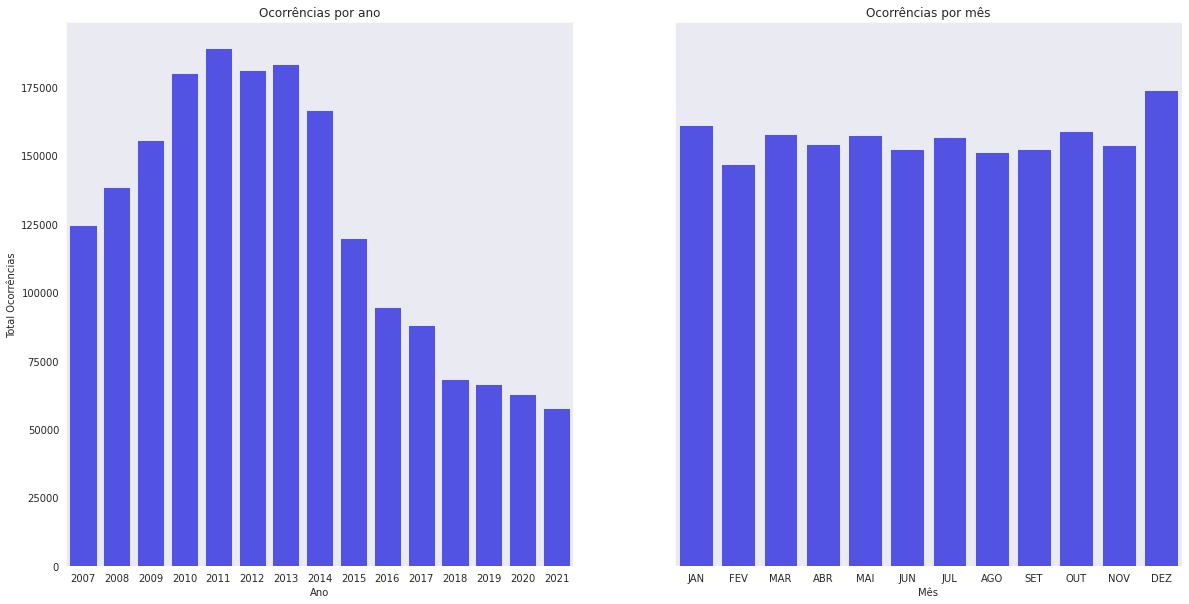

In [ ]:
# Occurrences by ano and mês
_, axs = plt.subplots(ncols=2, sharey=True, figsize=(20, 10))

# Year (ano)
p = sns.barplot(x='ano', y='id', data=group_data(df, 'ano', 'id', 'count'), color='Blue', alpha=0.75, ax=axs[0])
set_axis(p, 'Ocorrências por ano', 'Ano', 'Total Ocorrências')

# Month (mes)
gp_data = group_data(df, 'mes', 'id', 'count')
gp_data['mes'] = gp_data.apply(lambda x: map_weekday[x.mes], axis=1)

p2 = sns.barplot(x='mes', y='id', data=gp_data, color='Blue', alpha=0.75, ax=axs[1])
set_axis(p2, 'Ocorrências por mês', 'Mês', '')

plt.show()

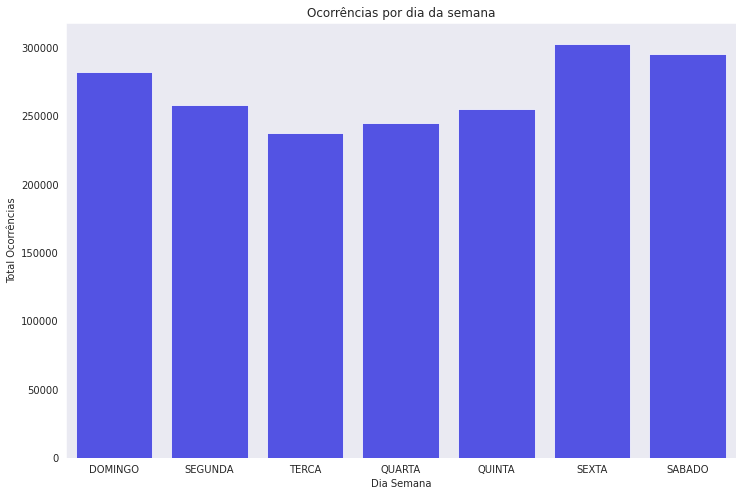

In [ ]:
# Occurrences by dia_semana
plot_size(12, 8)
p = sns.barplot(x='dia_semana', y='id', data=group_data(df, 'dia_semana', 'id', 'count'), color='Blue', alpha=0.75, order=['DOMINGO', 'SEGUNDA', 'TERCA', 'QUARTA', 'QUINTA', 'SEXTA', 'SABADO'])
set_axis(p, 'Ocorrências por dia da semana', 'Dia Semana', 'Total Ocorrências')
plt.show()

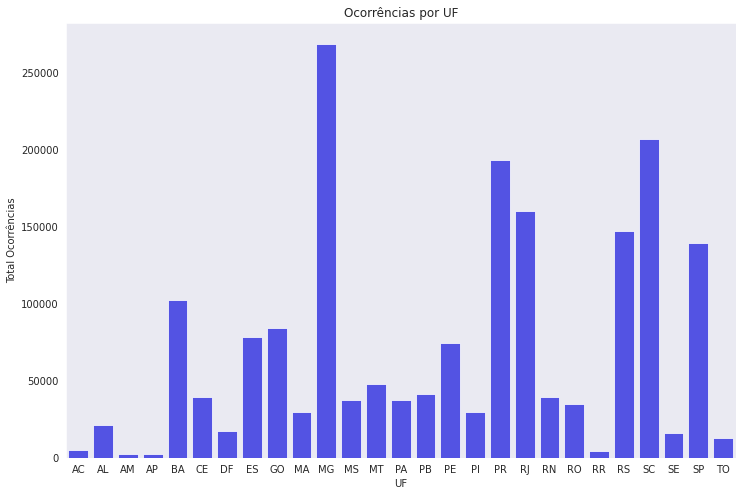

In [ ]:
# Occurrences by uf
plot_size(12, 8)
p = sns.barplot(x='uf', y='id', data=group_data(df, 'uf', 'id', 'count'), color='Blue', alpha=0.75)
set_axis(p, 'Ocorrências por UF', 'UF', 'Total Ocorrências')
plt.show()

In [ ]:
# Porcentagem de ocorrência por estado
df_perc_ocorrencia_uf = group_data(df, 'uf', 'id', 'count')
total_oc = df_perc_ocorrencia_uf['id'].sum()
df_perc_ocorrencia_uf['perc'] = df_perc_ocorrencia_uf.apply(lambda x: round(x['id'] / total_oc * 100, 2), axis=1)
df_perc_ocorrencia_uf.head(30)

,uf,id,perc
0,AC,5366,0.29
1,AL,21058,1.12
2,AM,2464,0.13
3,AP,2742,0.15
4,BA,102263,5.45
5,CE,39617,2.11
6,DF,17444,0.93
7,ES,78763,4.20
8,GO,84281,4.49
9,MA,29444,1.57


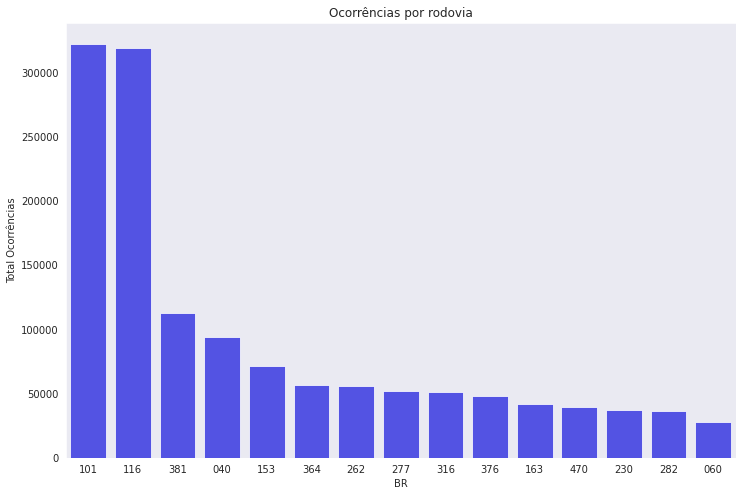

In [ ]:
# Occurrences by br
# Show the 15 most roads
plot_size(12, 8)
p = sns.barplot(x='br', y='id', data=group_data(df, 'br', 'id', 'count').sort_values(by=['id'], ascending=False)[0:15], color='Blue', alpha=0.75)
set_axis(p, 'Ocorrências por rodovia', 'BR', 'Total Ocorrências')
plt.show()

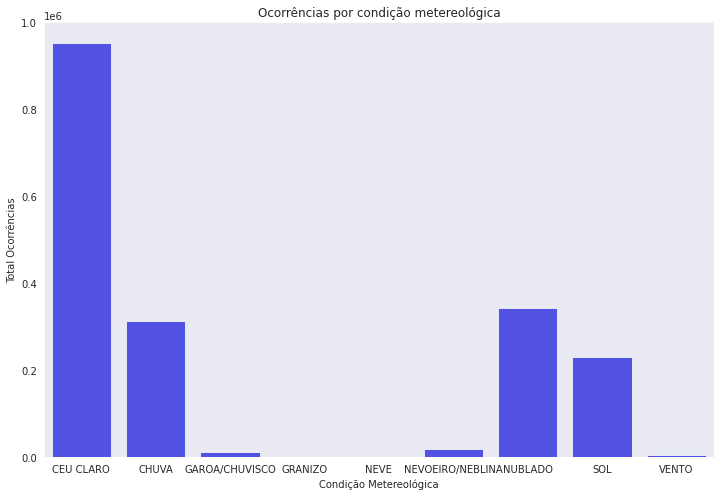

In [ ]:
# Occurrences by condicao_metereologica
plot_size(12, 8)
p = sns.barplot(x='condicao_metereologica', y='id', data=group_data(df, 'condicao_metereologica', 'id', 'count'), color='Blue', alpha=0.75)
set_axis(p, 'Ocorrências por condição metereológica', 'Condição Metereológica', 'Total Ocorrências')
plt.show()

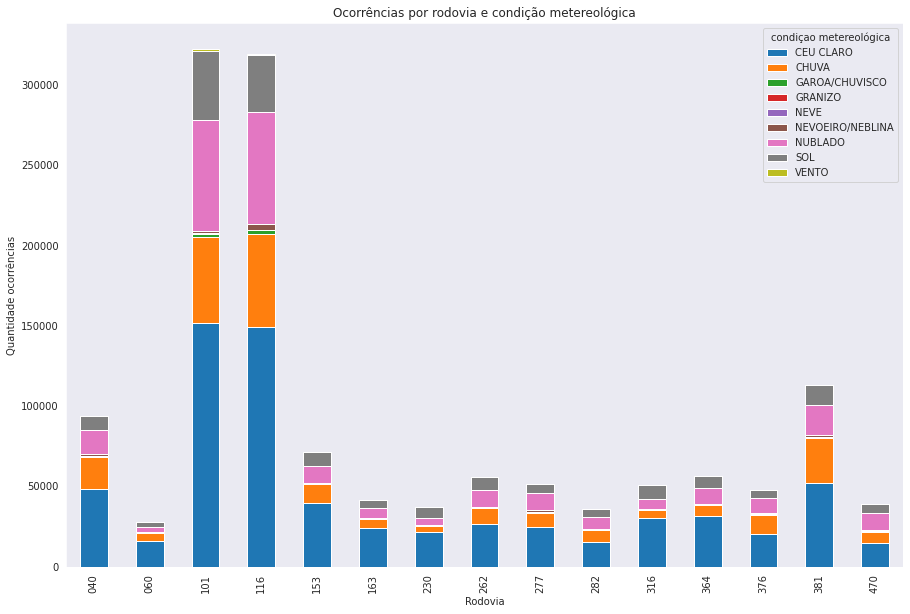

In [ ]:
# Occurrences by br and condicao_metereologica
# Show the 15 most roads
main_br = group_data(df, 'br', 'id', 'count').sort_values(by=['id'], ascending=False)[0:15]['br'].values.tolist()
df_temp = df[df.br.isin(main_br)].groupby(['br', 'condicao_metereologica'])['id'].count().unstack()
df_temp.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Ocorrências por rodovia e condição metereológica')
plt.legend(title='condiçao metereológica')
plt.xlabel('Rodovia')
plt.ylabel('Quantidade ocorrências')
plt.show()

Plots checking by victims (fatal or not):
- Victims by:
    - br
    - km
    - dia_semana
    - condicao_metereologica

**For these graphs, I consider only the 15 roads with more registers.**

In [ ]:
# Filtering
br_15 = group_data(df, 'br', 'id', 'count').sort_values(by=['id'], ascending=False)[0:15]['br'].tolist()
df_15_more = df[df.br.isin(br_15)]

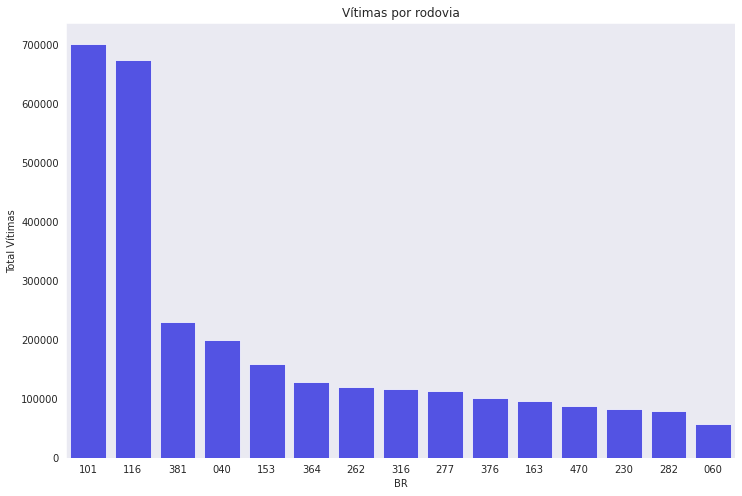

In [ ]:
# Victims by br
plot_size(12, 8)
p = sns.barplot(x='br', y='pessoas', data=group_data(df_15_more, 'br', 'pessoas', 'sum').sort_values(by=['pessoas'], ascending=False)[0:15], color='Blue', alpha=0.75)
set_axis(p, 'Vítimas por rodovia', 'BR', 'Total Vítimas')
plt.show()

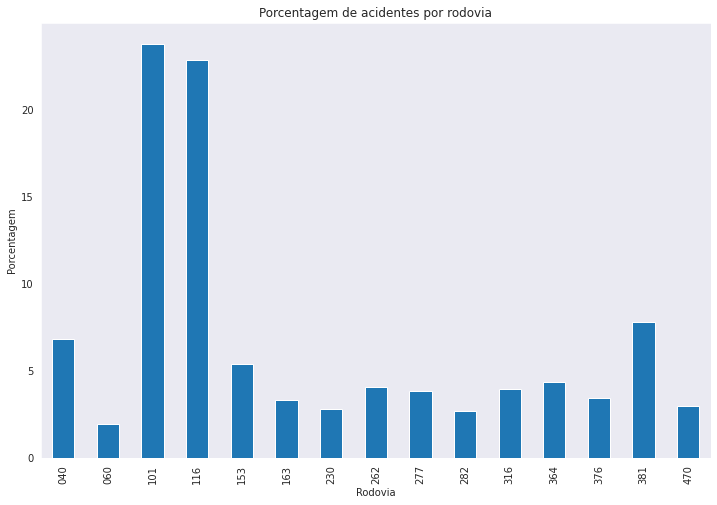

In [ ]:
# Victims by br percentage
df_temp = df_15_more.groupby('br').agg({'pessoas': 'sum'})
df_temp['percent'] = df_temp.apply(lambda x: x.pessoas/df_temp.pessoas.sum()*100, axis=1)
df_temp.drop(columns=['pessoas'], inplace=True)
df_temp.plot(kind='bar', stacked=True, figsize=(12, 8), legend=False)
plt.title('Porcentagem de acidentes por rodovia')
plt.xlabel('Rodovia')
plt.ylabel('Porcentagem')
plt.show()

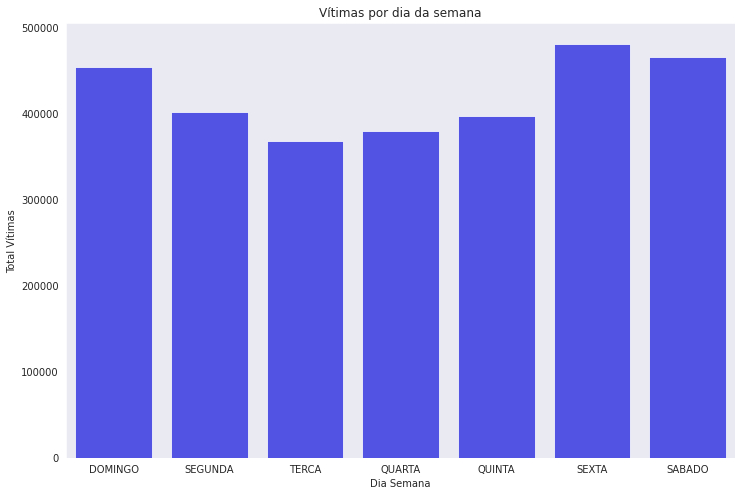

In [ ]:
# Victims by dia_semana
plot_size(12, 8)
p = sns.barplot(x='dia_semana', y='pessoas', data=group_data(df_15_more, 'dia_semana', 'pessoas', 'sum'), color='Blue', alpha=0.75, order=['DOMINGO', 'SEGUNDA', 'TERCA', 'QUARTA', 'QUINTA', 'SEXTA', 'SABADO'])
set_axis(p, 'Vítimas por dia da semana', 'Dia Semana', 'Total Vítimas')
plt.show()

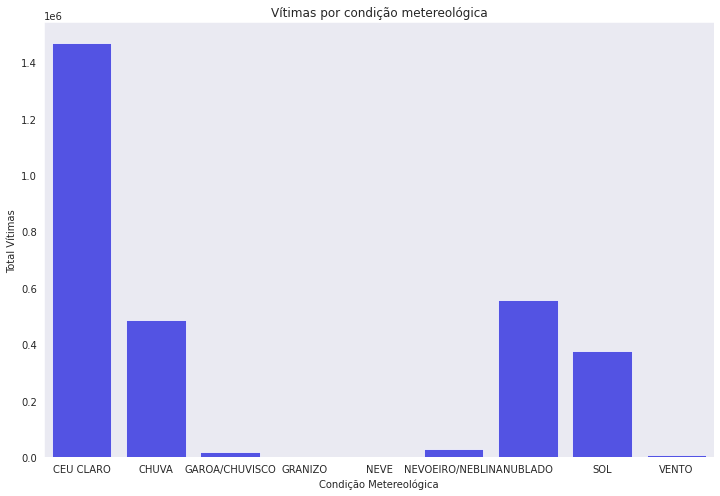

In [ ]:
# Victims by condicao_metereologica
plot_size(12, 8)
p = sns.barplot(x='condicao_metereologica', y='pessoas', data=group_data(df_15_more, 'condicao_metereologica', 'pessoas', 'sum'), color='Blue', alpha=0.75)
set_axis(p, 'Vítimas por condição metereológica', 'Condição Metereológica', 'Total Vítimas')
plt.show()

Analisando os gráficos é possível notar 3 aspectos importantes:
- MG tem uma quantidade de ocorrências muito mais alta que os demais;
- As rodovias 101 e 116 são responsáveis por mais de 40% das ocorrências*;
- Os acidentes ocorridos com condição metereológica de céu claro é dominante e outras como granizo, neve, vento são praticamente inexistentes*;

*Quando analisadas as 15 rodovias com maior quantidade de ocorrências e vítimas.

### Análises para definição de próximos passos

In [ ]:
# Filter MG state
df_mg = df[df.uf == 'MG']

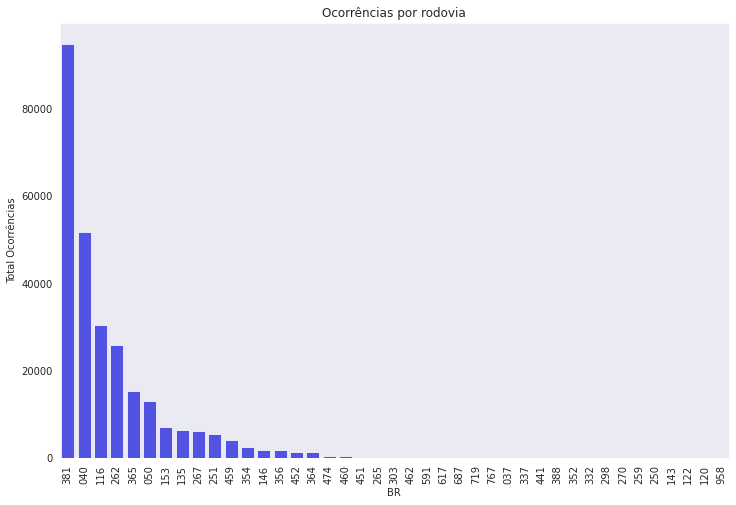

In [ ]:
# Occurrencies by br in MG
plot_size(12, 8)
p = sns.barplot(x='br', y='id', data=group_data(df_mg, 'br', 'id', 'count').sort_values(by=['id'], ascending=False), color='Blue', alpha=0.75)
set_axis(p, 'Ocorrências por rodovia', 'BR', 'Total Ocorrências')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Filter br 101 and 116
df_roads = df_15_more[df_15_more.br.isin(['101', '116'])]

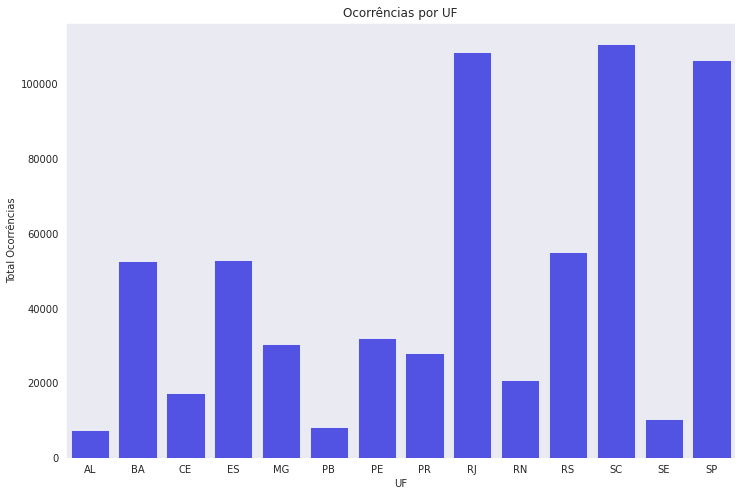

In [ ]:
# Occurrences by uf
plot_size(12, 8)
p = sns.barplot(x='uf', y='id', data=group_data(df_roads, 'uf', 'id', 'count'), color='Blue', alpha=0.75)
set_axis(p, 'Ocorrências por UF', 'UF', 'Total Ocorrências')
plt.show()

In [ ]:
# Filter RJ, SC and SP states
df_ufs = df[df.uf.isin(['RJ', 'SC', 'SP'])] 

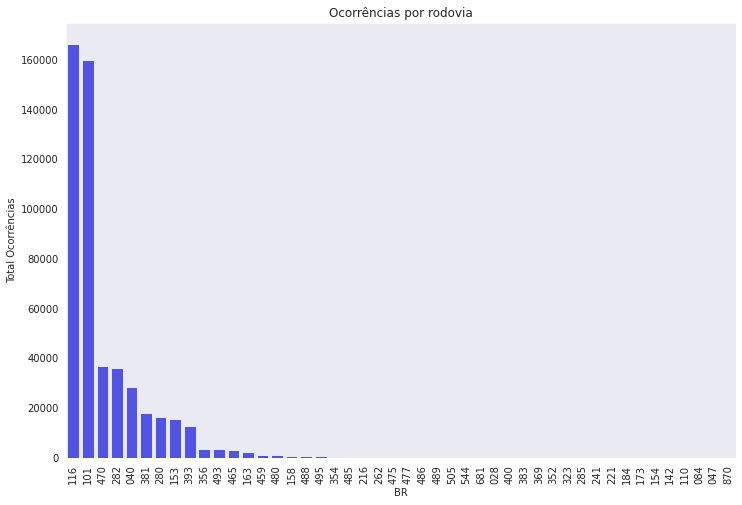

In [ ]:
# Occurrencies by br in RJ, SC and SP states
plot_size(12, 8)
p = sns.barplot(x='br', y='id', data=group_data(df_ufs, 'br', 'id', 'count').sort_values(by=['id'], ascending=False), color='Blue', alpha=0.75)
set_axis(p, 'Ocorrências por rodovia', 'BR', 'Total Ocorrências')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Filter others br than 101 and 116
df_roads = df_15_more[~df_15_more.br.isin(['101', '116'])]

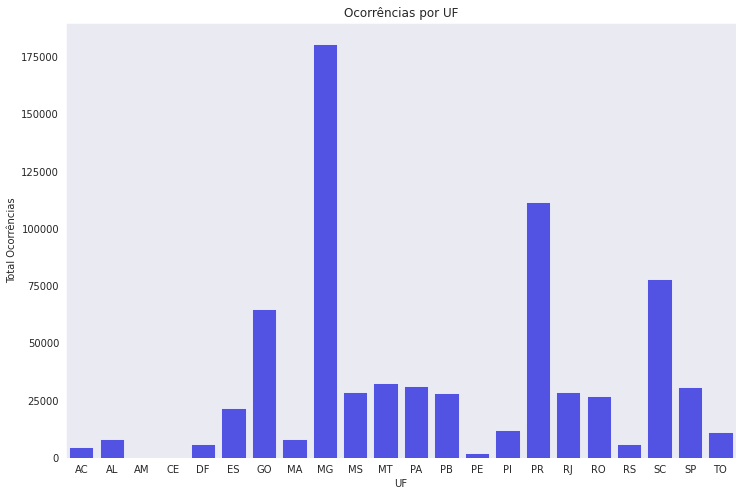

In [ ]:
# Occurrences by uf
plot_size(12, 8)
p = sns.barplot(x='uf', y='id', data=group_data(df_roads, 'uf', 'id', 'count'), color='Blue', alpha=0.75)
set_axis(p, 'Ocorrências por UF', 'UF', 'Total Ocorrências')
plt.show()

#### Agrupando a condição metereológica

In [ ]:
df['condicao_metereologica'].unique()

array(['CEU CLARO', 'CHUVA', 'NUBLADO', 'SOL', 'NEVOEIRO/NEBLINA',
       'VENTO', 'GRANIZO', 'NEVE', 'GAROA/CHUVISCO'], dtype=object)

groups:
- (CEU CLARO) = CEU CLARO
- (SOL) = SOL
- (CHUVA, GAROA/CHUVISCO, GRANIZO, NEVE) = CHUVA
- (NUBLADO, NEVOEIRO/NEBLINA, VENTO) = NUBLADO

In [ ]:
map_cond_metereologica = {
    'CEU CLARO': 'CEU CLARO',
    'SOL': 'SOL',
    'CHUVA': 'CHUVA',
    'GAROA/CHUVISCO': 'CHUVA',
    'GRANIZO': 'CHUVA',
    'NEVE': 'CHUVA',
    'NUBLADO': 'NUBLADO',
    'NEVOEIRO/NEBLINA': 'NUBLADO',
    'VENTO': 'NUBLADO'
}

In [ ]:
df['cond_metereologica_agg'] = df.apply(lambda x: map_cond_metereologica[x.condicao_metereologica], axis=1)

In [ ]:
df['cond_metereologica_agg'].unique()

array(['CEU CLARO', 'CHUVA', 'NUBLADO', 'SOL'], dtype=object)

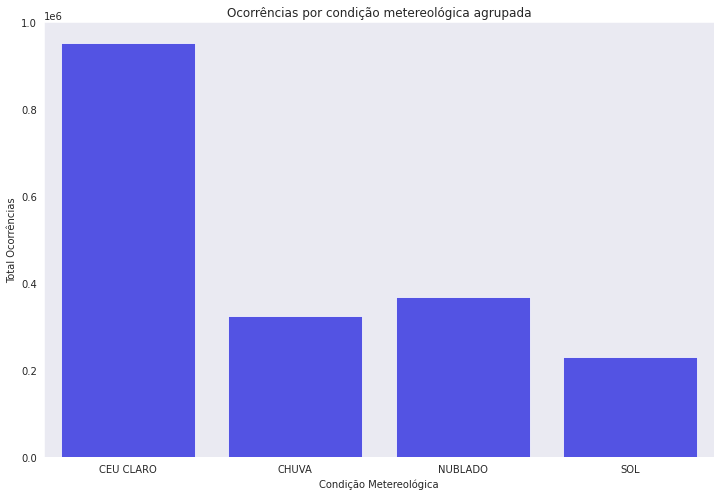

In [ ]:
# Occurrences by cond_metereologica_agg
plot_size(12, 8)
p = sns.barplot(x='cond_metereologica_agg', y='id', data=group_data(df, 'cond_metereologica_agg', 'id', 'count'), color='Blue', alpha=0.75)
set_axis(p, 'Ocorrências por condição metereológica agrupada', 'Condição Metereológica', 'Total Ocorrências')
plt.show()

In [ ]:
# Filtering 15 more roads by occurrence
br_15 = group_data(df, 'br', 'id', 'count').sort_values(by=['id'], ascending=False)[0:15]['br'].tolist()
df_15_more = df[df.br.isin(br_15)].copy()

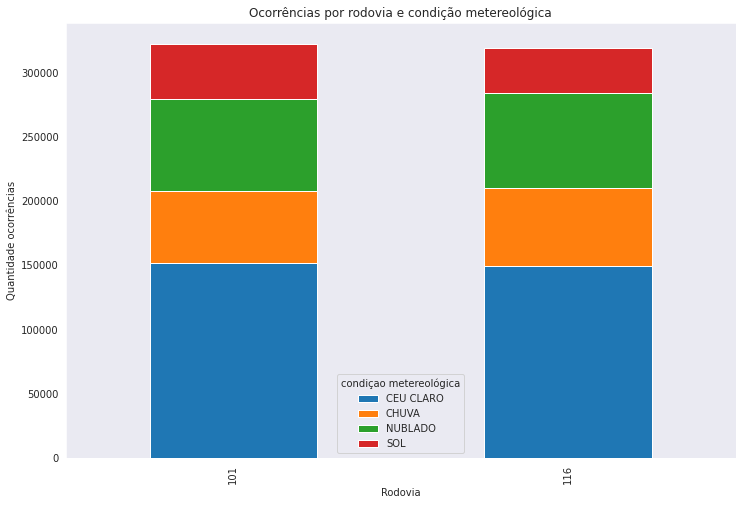

In [ ]:
# Occurrences by br and condicao_metereologica
# Show br 101 and 116 most roads
df_temp = df_15_more[df_15_more.br.isin(['101', '116'])].groupby(['br', 'cond_metereologica_agg'])['id'].count().unstack()
df_temp.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Ocorrências por rodovia e condição metereológica')
plt.legend(title='condiçao metereológica')
plt.xlabel('Rodovia')
plt.ylabel('Quantidade ocorrências')
plt.show()

In [ ]:
# Checking fase_dia and horario column
df_15_more['fase_dia'].unique()

array(['PLENO DIA', 'ANOITECER', 'PLENA NOITE', 'AMANHECER', '(NULL)'],
      dtype=object)

In [ ]:
df_15_more[df_15_more.fase_dia == '(NULL)']['fase_dia'].count()

40

In [ ]:
# Removing null from fase_dia
df_15_more = df_15_more[~(df_15_more.fase_dia == '(NULL)')]

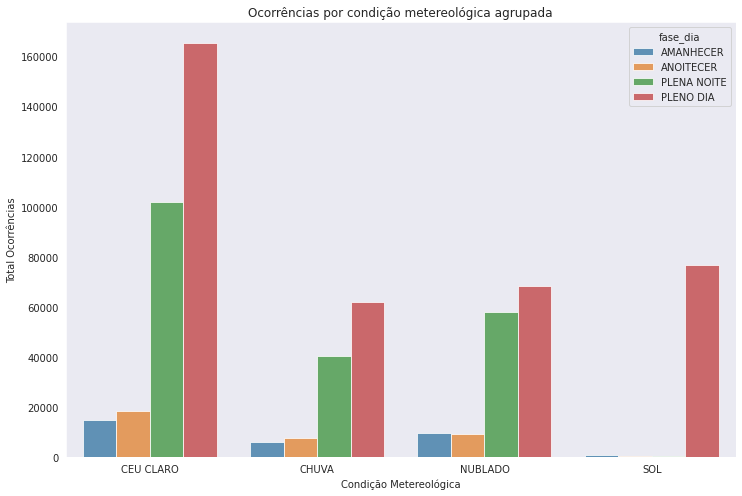

In [ ]:
# Fase_dia of condicao_metereologica
# Show br 101 and 116 most roads
plot_size(12, 8)
df_temp_101 = df_15_more[df_15_more.br.isin(['101', '116'])].copy()
p = sns.barplot(x='cond_metereologica_agg', y='id', data=group_data(df_temp_101, ['cond_metereologica_agg', 'fase_dia'], 'id', 'count'), hue='fase_dia', ci='sd', alpha=0.75)
set_axis(p, 'Ocorrências por condição metereológica agrupada', 'Condição Metereológica', 'Total Ocorrências')
plt.show()

In [ ]:
# Aggrouping fase_dia feature
map_fase_dia = {
    'AMANHECER': 'DIA',
    'PLENO DIA': 'DIA',
    'ANOITECER': 'NOITE',
    'PLENA NOITE': 'NOITE'
}

df_15_more['fase_dia_agg'] = df_15_more.apply(lambda x: map_fase_dia[x.fase_dia], axis=1)

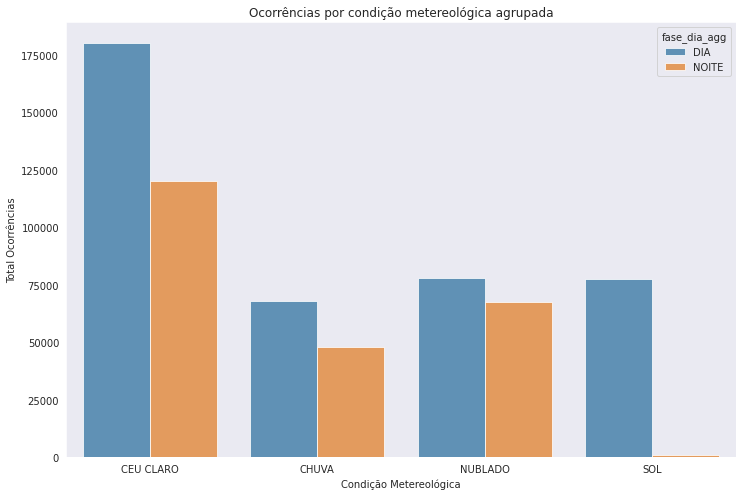

In [ ]:
# Show br 101 and 116 most roads
plot_size(12, 8)
df_temp_101 = df_15_more[df_15_more.br.isin(['101', '116'])].copy()
p = sns.barplot(x='cond_metereologica_agg', y='id', data=group_data(df_temp_101, ['cond_metereologica_agg', 'fase_dia_agg'], 'id', 'count'), hue='fase_dia_agg', ci='sd', alpha=0.75)
set_axis(p, 'Ocorrências por condição metereológica agrupada', 'Condição Metereológica', 'Total Ocorrências')
plt.show()

In [ ]:
# Types of causa_acidente
df_15_more['causa_acidente'].nunique()

92

In [ ]:
# Types of tipo_acidente
df_15_more['tipo_acidente'].nunique()

26

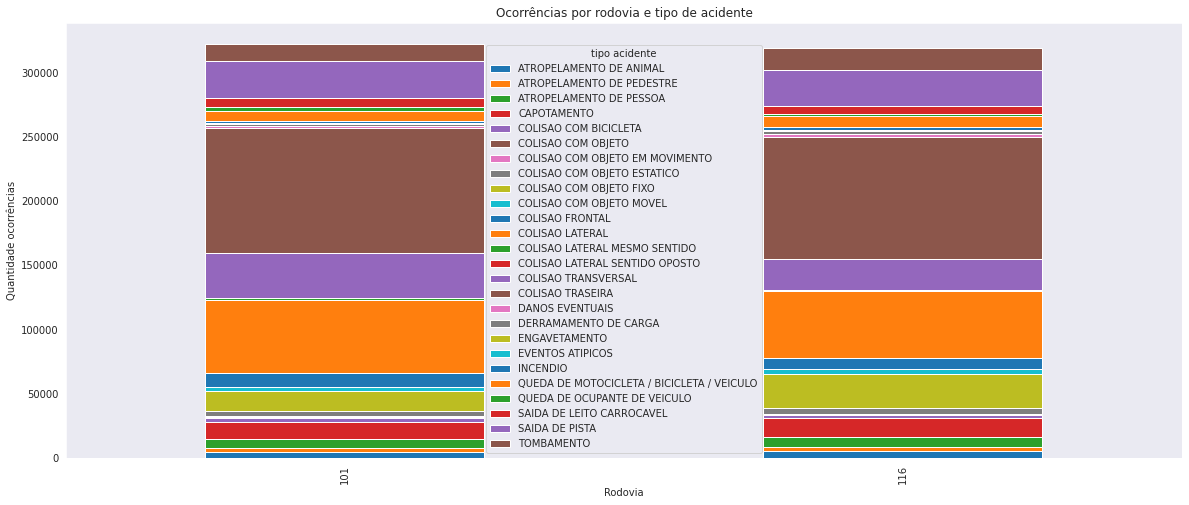

In [ ]:
# Occurrences by br and tipo_acidente
# Show br 101 and 116 most roads
df_temp = df_15_more[df_15_more.br.isin(['101', '116'])].groupby(['br', 'tipo_acidente'])['id'].count().unstack()
df_temp.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Ocorrências por rodovia e tipo de acidente')
plt.legend(title='tipo acidente')
plt.xlabel('Rodovia')
plt.ylabel('Quantidade ocorrências')
plt.show()

In [ ]:
# Aggrouping tipo_acidente feature
df_15_more['tipo_acidente_agg'] = df_15_more.apply(lambda x: x.tipo_acidente.split(' ')[0], axis=1)

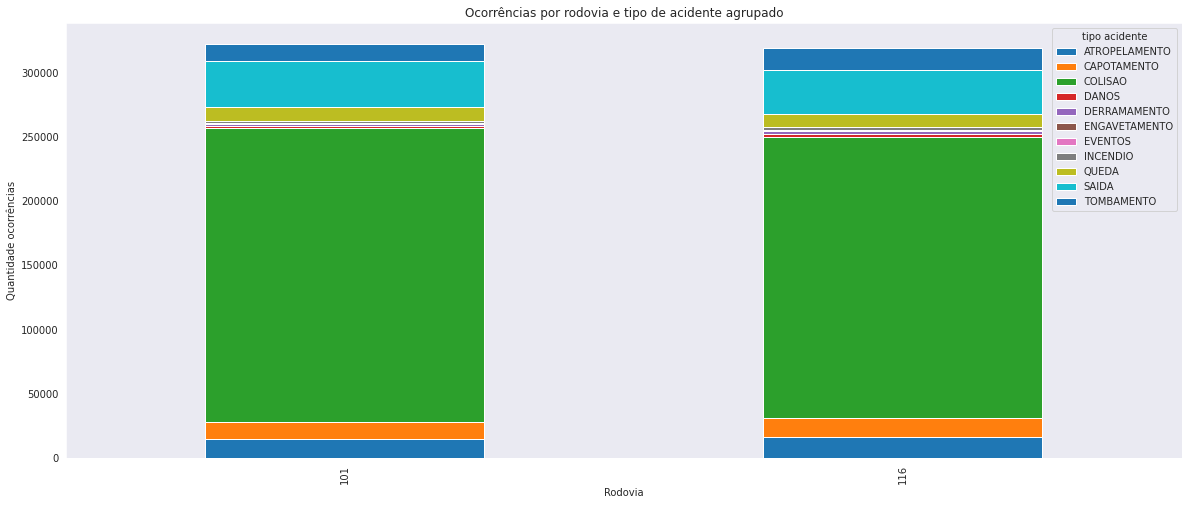

In [ ]:
# Occurrences by br and tipo_acidente_agg
# Show br 101 and 116 most roads
df_temp = df_15_more[df_15_more.br.isin(['101', '116'])].groupby(['br', 'tipo_acidente_agg'])['id'].count().unstack()
df_temp.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Ocorrências por rodovia e tipo de acidente agrupado')
plt.legend(title='tipo acidente')
plt.xlabel('Rodovia')
plt.ylabel('Quantidade ocorrências')
plt.show()

In [ ]:
# Types of tipo_acidente
df_15_more['classificacao_acidente'].nunique()

5

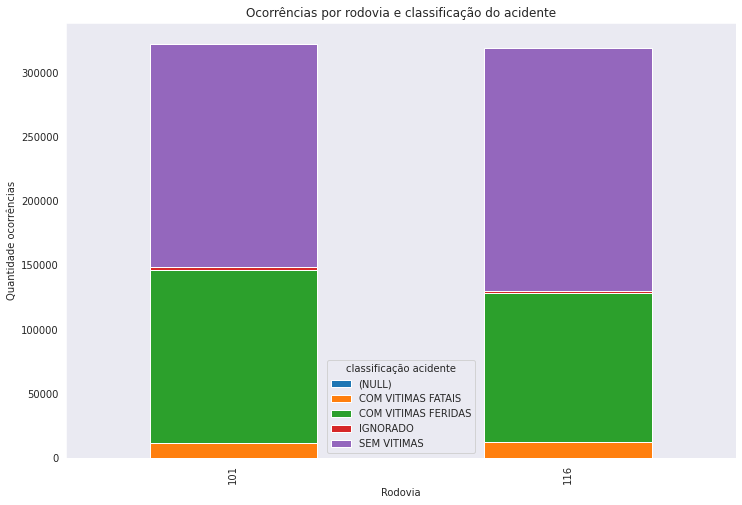

In [ ]:
# Occurrences by br and classificacao_acidente
# Show br 101 and 116 most roads
df_temp = df_15_more[df_15_more.br.isin(['101', '116'])].groupby(['br', 'classificacao_acidente'])['id'].count().unstack()
df_temp.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Ocorrências por rodovia e classificação do acidente')
plt.legend(title='classificação acidente')
plt.xlabel('Rodovia')
plt.ylabel('Quantidade ocorrências')
plt.show()

In [ ]:
# Quantity of km_intervalo greater than 0
df_15_more[~df_15_more.km.str.contains('-')]['km_intervalo'].nunique()

98

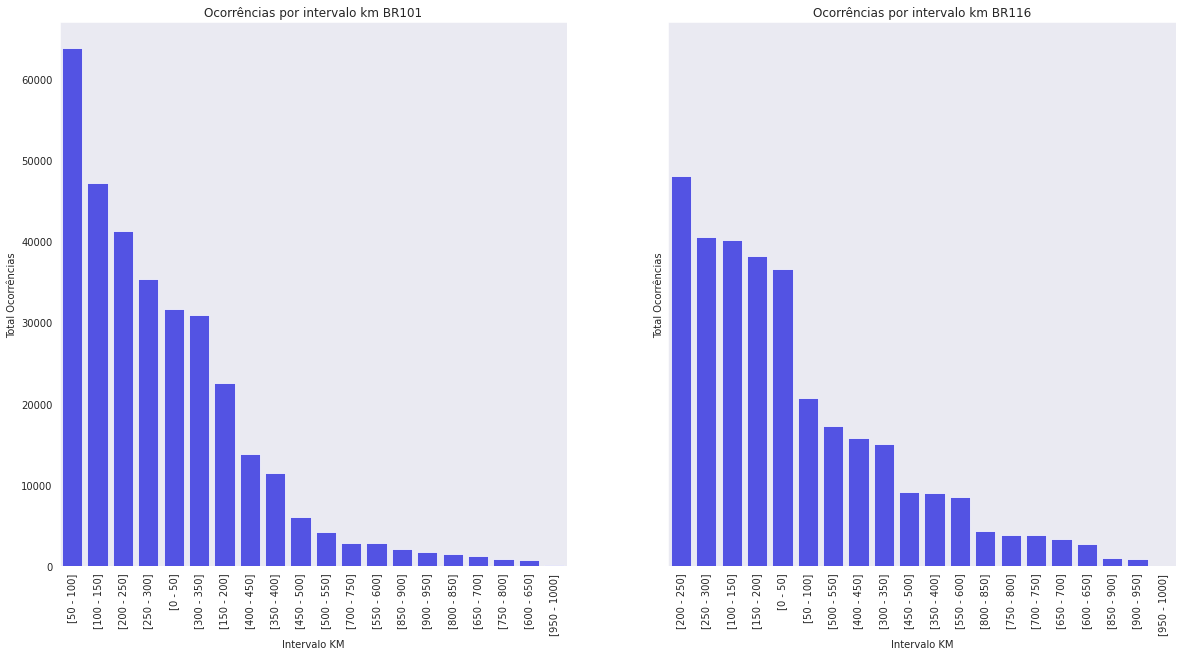

In [ ]:
# Occurrences by km_intervalo by road
_, axs = plt.subplots(ncols=2, sharey=True, figsize=(20, 10))

# BR101
p = sns.barplot(x='km_intervalo', y='id', data=group_data(df_15_more[df_15_more.br.isin(['101'])], 'km_intervalo', 'id', 'count').sort_values(by=['id'], ascending=False)[0:20], color='Blue', alpha=0.75, ax=axs[0])
set_axis(p, 'Ocorrências por intervalo km BR101', 'Intervalo KM', 'Total Ocorrências')
p.tick_params(axis='x', labelrotation=90)

# BR116
p2 = sns.barplot(x='km_intervalo', y='id', data=group_data(df_15_more[df_15_more.br.isin(['116'])], 'km_intervalo', 'id', 'count').sort_values(by=['id'], ascending=False)[0:20], color='Blue', alpha=0.75, ax=axs[1])
set_axis(p2, 'Ocorrências por intervalo km BR116', 'Intervalo KM', 'Total Ocorrências')
plt.xticks(rotation=90)
plt.show()

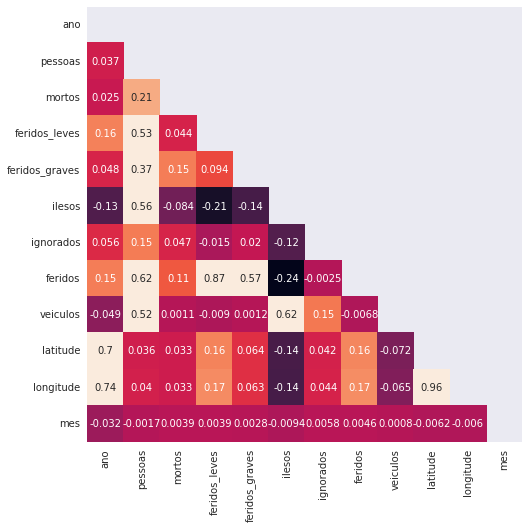

In [ ]:
# Correlation between variables
corr = df_15_more[df_15_more.br.isin(['101', '116'])].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr, mask=mask, annot=True, vmax=.3, cbar=False, square=True)

### Próximos passos

Pelo analisado com vistas ao balanceamento dos dados, o dataset final conterá as ocorrências dos seguintes pontos:
- Estados do RJ, SP e SC, por conta do balanceamento dos registros de ocorrência;
- Das rodovias 101 e 116 e os 15 maiores intervalos de km em números de ocorrência;
- Os campos 'id', 'data_inversa', 'horario', 'km', 'municipio', 'causa_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'regional', 'delegacia', 'uop' serão removidos pois não acrescentam informação relevante para serem utilizadas na contrução do modelo;
- Por se tratar de uma proposta de modelo que preveja a quantidade de pessoas envolvidas no acidente, independente de ser vítima fatal, os campos 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos' e 'ignorados' serão removidos;
- Os campos latitude e longitude serão utilizados na construção de uma tabela a parte e que poderá ser utilizada com algum framework de criação de mapa.

In [ ]:
# Get 15 greater intervals
interval = 15
df_101  = group_data(df_15_more[df_15_more.br.isin(['101'])], 'km_intervalo', 'id', 'count').sort_values(by=['id'], ascending=False)[0:interval]['km_intervalo'].tolist()
df_116  = group_data(df_15_more[df_15_more.br.isin(['116'])], 'km_intervalo', 'id', 'count').sort_values(by=['id'], ascending=False)[0:interval]['km_intervalo'].tolist()
intervals = df_101 + df_116

In [ ]:
mask = df_15_more.uf.isin(['RJ', 'SP', 'SC']) & df_15_more.br.isin(['101', '116']) & (df_15_more.km_intervalo.isin(intervals))
df_final = df_15_more[mask].copy()

In [ ]:
df_final.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'ano', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'km_intervalo', 'mes', 'cond_metereologica_agg',
       'fase_dia_agg', 'tipo_acidente_agg'],
      dtype='object')

In [ ]:
# Dataframe shape
df_final.shape

(325862, 36)

In [ ]:
# Dataframe long_lat
df_long_lat = df_final[['uf', 'km_intervalo', 'longitude', 'latitude']]
df_long_lat = df_long_lat.groupby(['uf', 'km_intervalo'], as_index=False).agg({'longitude': 'mean', 'latitude': 'mean'})
df_long_lat.to_csv('/content/drive/MyDrive/PosPuc/TCC/datasets/acidentes_ocorrencia/df_long_lat.csv', index=False, encoding='utf-8')

In [ ]:
# Dataframe final EDA
# Chosen columns that is important to analysis 
chosen_columns = ['dia_semana', 'uf', 'br', 'tipo_acidente_agg', 'fase_dia_agg', 'pessoas', 
                  'km_intervalo', 'mes', 'cond_metereologica_agg']

df_final = df_final[chosen_columns]
df_final.to_csv('/content/drive/MyDrive/PosPuc/TCC/datasets/acidentes_ocorrencia/df_final_eda.csv', index=False, encoding='utf-8')